In [1]:
from datetime import datetime as dt
from preprocessing import Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import RandomOverSampler

# Preprocessing

In [2]:
col_drop = ['CustomerId','Surname']
types = {
    'HasCrCard':bool,
    'IsActiveMember':bool
}
train = pd.read_csv('data/train.csv', index_col='id', dtype=types).drop(columns=col_drop)
test = pd.read_csv('data/test.csv', index_col='id', dtype=types).drop(columns=col_drop)

In [3]:
train.shape

(165034, 11)

In [4]:
X = train.drop(columns='Exited')
y = train.Exited

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.15)

In [6]:
prepro = Preprocessing()

In [13]:
X_train_scld = prepro.fit_transform(X_train)
X_test_scld = prepro.transform(X_test)

In [14]:
ros = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = ros.fit_resample(X_train_scld, y_train)

# Model

In [57]:
params = {
    'hidden_layer_sizes':(64,32),
    'alpha':1e-4,
    'max_iter':500,
    'activation':'relu',
    'learning_rate':'adaptive',
    'learning_rate_init':0.0001,
    
}

nn = MLPClassifier(
    **params, random_state=42, verbose=True)

In [58]:
nn.fit(X_train_resample, y_train_resample)

Iteration 1, loss = 0.57709618
Iteration 2, loss = 0.52274494
Iteration 3, loss = 0.50453682
Iteration 4, loss = 0.48633117
Iteration 5, loss = 0.46925097
Iteration 6, loss = 0.45636659
Iteration 7, loss = 0.44797044
Iteration 8, loss = 0.44286502
Iteration 9, loss = 0.43998213
Iteration 10, loss = 0.43813838
Iteration 11, loss = 0.43710044
Iteration 12, loss = 0.43640765
Iteration 13, loss = 0.43592634
Iteration 14, loss = 0.43560167
Iteration 15, loss = 0.43527708
Iteration 16, loss = 0.43510289
Iteration 17, loss = 0.43489685
Iteration 18, loss = 0.43468547
Iteration 19, loss = 0.43460381
Iteration 20, loss = 0.43441627
Iteration 21, loss = 0.43431332
Iteration 22, loss = 0.43425419
Iteration 23, loss = 0.43408738
Iteration 24, loss = 0.43398380
Iteration 25, loss = 0.43386840
Iteration 26, loss = 0.43378278
Iteration 27, loss = 0.43368328
Iteration 28, loss = 0.43362639
Iteration 29, loss = 0.43351493
Iteration 30, loss = 0.43351459
Iteration 31, loss = 0.43343256
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=500, random_state=42,
              verbose=True)

In [59]:
roc_auc_score(y_train_resample,nn.predict_proba(X_train_resample)[:,1])

0.8815344495308199

# Score

In [60]:
pred = nn.predict(X_test_scld)
pred_proba = nn.predict_proba(X_test_scld)[:,1]

In [61]:
RocScore  = roc_auc_score(y_test, pred_proba)
print(f'Roc Auc Score : {RocScore:.6f}')

Roc Auc Score : 0.880212


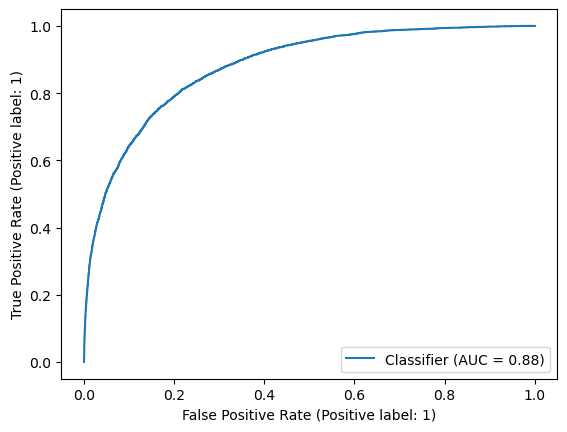

In [62]:
RocCurveDisplay.from_predictions(y_test,pred_proba)

# Submission

In [ ]:
X_val_scld = prepro.transform(test)

In [ ]:
submission = pd.read_csv("data/sample_submission.csv", index_col='id')

In [ ]:
submission.loc[:,'Exited'] = nn.predict_proba(X_val_scld)[:,1]

/Users/marc/Library/Mobile Documents/com~apple~CloudDocs/Projects/Playground/playgroundseries_s4e1/.venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission

,Exited
id,
165034,0.080412
165035,0.951204
165036,0.096977
165037,0.529652
165038,0.639720
...,...
275052,0.134360
275053,0.228869
275054,0.064918


In [ ]:
name = dt.now().strftime("%Y%m%d_%H%M")

In [ ]:
#submission.to_csv(f"submission/{name}.csv")